In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/netflix-stock-price-prediction/NFLX.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df['Change'] = round(- 100 +(df["Close"] * 100 / df["Open"]),2)

In [5]:
is_same = df["Close"] == df["Adj Close"]
is_same.value_counts()

True    1009
dtype: int64

On enlève la colonne "Adj Close" car on a les mêmes valeurs sur "Close".

In [6]:
df = df.drop("Adj Close", axis = 1)

In [7]:
df1 = df.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1009 non-null   object 
 1   Open    1009 non-null   float64
 2   High    1009 non-null   float64
 3   Low     1009 non-null   float64
 4   Close   1009 non-null   float64
 5   Volume  1009 non-null   int64  
 6   Change  1009 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [9]:
import matplotlib.pyplot as plt

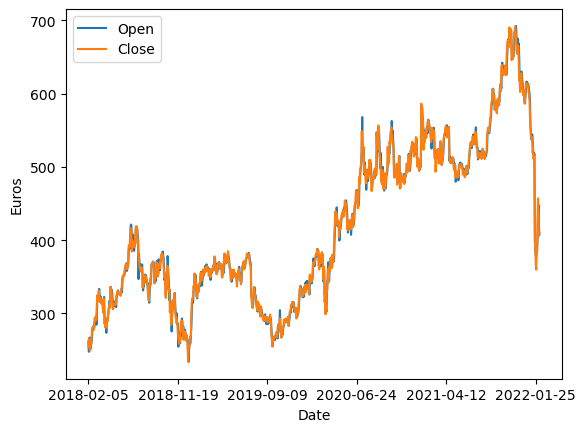

In [10]:
df.plot(x = "Date", y = ["Open","Close"], kind = "line")
plt.ylabel("Euros")
plt.show()

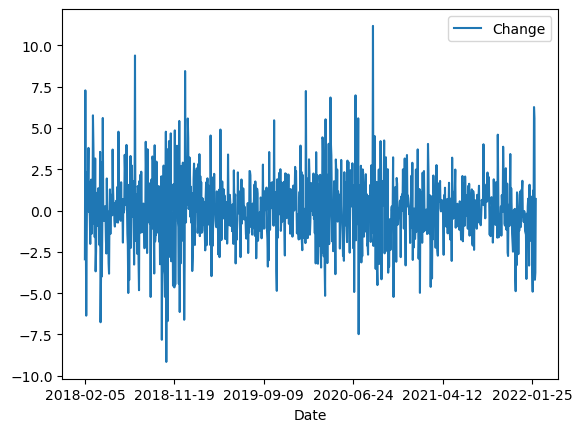

In [11]:
df.plot(x = "Date", y = "Change", kind = "line")
plt.show()

On va essayer les regrouper par Mois et Année pour voir mieux dedans.

In [12]:
df["Date"] = pd.to_datetime(df["Date"])

In [13]:
per_month = df.set_index("Date").groupby(pd.Grouper(freq = "M")).mean()
per_month = per_month.reset_index()

In [14]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


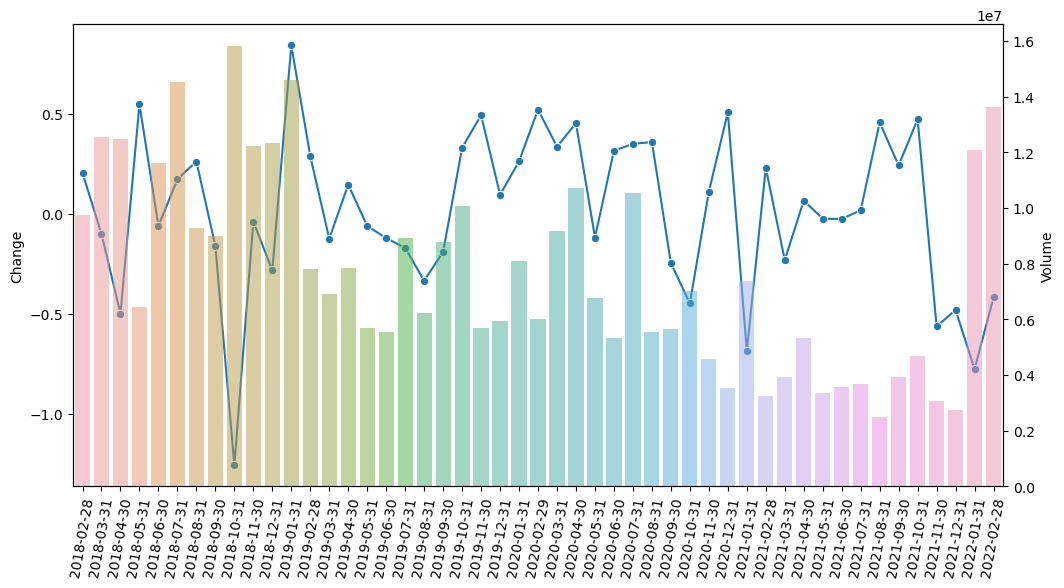

In [15]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = per_month["Change"] , marker='o', sort = False, ax=ax1)
plt.xticks(rotation = 80)
ax2 = ax1.twinx()

sns.barplot(data = per_month, x = per_month['Date'].dt.date, y = 'Volume', alpha = 0.5, ax = ax2)

plt.show()

Sur des plus grands volumes, le change baisse et augmente sur des plus petits volumes.

In [16]:
pd.melt(per_month[["Close","Open","Date"]],["Date"])

,Date,variable,value
0,2018-02-28,Close,272.054705
1,2018-03-31,Close,312.228097
2,2018-04-30,Close,307.466192
3,2018-05-31,Close,331.536819
4,2018-06-30,Close,384.133336
...,...,...,...
93,2021-10-31,Open,639.220474
94,2021-11-30,Open,671.363334
95,2021-12-31,Open,611.568640
96,2022-01-31,Open,492.055000


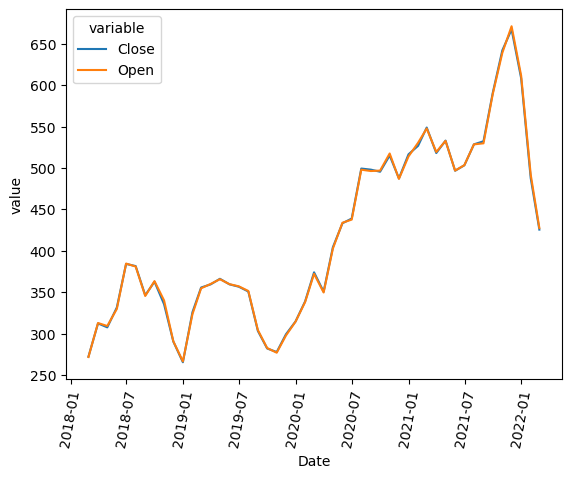

In [17]:
sns.lineplot(x = "Date", y = "value",hue = "variable", data = pd.melt(per_month[["Close","Open","Date"]],["Date"]))
plt.xticks(rotation = 80)
plt.show()

Passons à la régression :

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
df1 = df1.drop("Date",axis = 1)

In [20]:
X = df1.drop("Close",axis = 1)
y = df1["Close"]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2)

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(X_test)
y_pred

array([617.64415098, 343.11013075, 386.06920409, 369.25116362,
       349.95153747, 365.44753197, 293.83324729, 486.98333227,
       590.20106933, 379.64254653, 518.0167325 , 338.39564062,
       292.30061769, 328.50775885, 376.84591664, 503.42075978,
       673.82714754, 316.68478284, 303.41714924, 534.94223683,
       651.53786063, 327.00220802, 468.97354861, 435.73347673,
       638.37191533, 271.54086628, 278.97134187, 533.90598804,
       375.90817205, 351.81993119, 487.91735132, 510.40720981,
       286.81675204, 295.34947285, 605.60158887, 494.7956704 ,
       323.57278126, 305.29590831, 553.89366643, 364.48412919,
       444.13541195, 360.77685648, 540.13065302, 339.96838622,
       230.99736938, 365.7805615 , 546.37939834, 303.68502462,
       550.44565969, 488.76826155, 586.33821126, 294.68380058,
       312.89658139, 478.19130697, 283.79996839, 290.82121965,
       351.56490937, 261.56076107, 310.4821947 , 281.58153474,
       371.09063889, 526.41802482, 367.46495783, 626.25

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [26]:
Validation = [["MSE:",  mean_squared_error(y_test,y_pred)], ["RMAE:",  np.sqrt(mean_absolute_error(y_test,y_pred))],
              ["MAE:", mean_absolute_error(y_test,y_pred)], ["r2:",  r2_score(y_test,y_pred)]]

In [27]:
for name,val in Validation :
    val = val
    print(name, round(val,3))

MSE: 4.505
RMAE: 1.224
MAE: 1.499
r2: 1.0


In [28]:
def style():
    plt.figure(facecolor = "black",figsize = (15,10))
    ax = plt.axes()
    ax.tick_params(axis = "x", colors = "white")
    ax.tick_params(axis = "y", colors = "white")
    
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.set_facecolor("black")

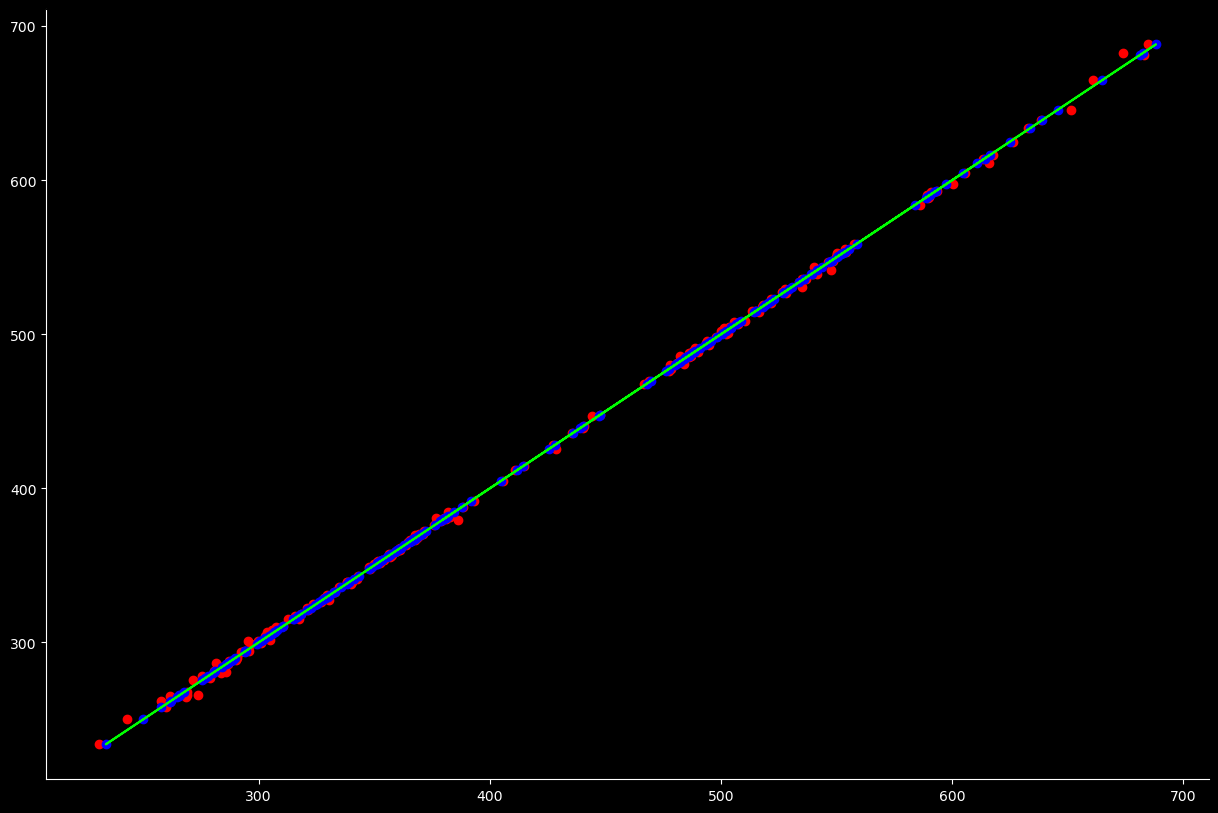

In [29]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')